In [59]:
import pickle
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import seaborn as sns
from statistics import stdev
from math import log
import numpy as np
from scipy import stats
from statistics import mean
%matplotlib inline


In [60]:
price_100_stan = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Standard\\stan_total_price.p","rb"))
price_100_brute = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Explicit\\brute_total_price.p", "rb"))
price_100_net = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Network\\net_total_price.p", "rb"))

In [61]:
from collections import defaultdict

def make_distro(price_100):
    all_stds =[]
    total_log = defaultdict(list)
    for run, output in price_100.items(): 
        for step, prices in output.items():
            log_pr = [log(p) for p in prices]
            if len(log_pr) <2: 
                pass       
            else:     
                out = stdev(log_pr)
                total_log[run].append(out) 
                all_stds.append(out)
    return all_stds




In [62]:
price_stan = make_distro(price_100_stan)
price_brute = make_distro(price_100_brute)
price_net = make_distro(price_100_net)

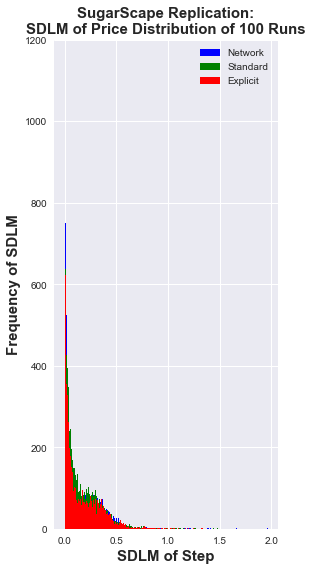

In [63]:
fig, ax = plt.subplots(figsize = (4,9))
ax.hist(price_net, 500, label = "Network", color='blue')
ax.hist(price_stan, 500, label = "Standard", color ='green')
ax.hist(price_brute, 500, label = "Explicit", color = 'red')

plt.title("SugarScape Replication:\nSDLM of Price Distribution of 100 Runs", fontsize = 15, fontweight = "bold")
plt.xlabel("SDLM of Step", fontsize = 15, fontweight = "bold")
plt.ylabel("Frequency of SDLM", fontsize = 15, fontweight = "bold")
#plt.xlim(.75,2)
plt.ylim(0,1200)
plt.legend()

In [64]:
## Calculate price

In [69]:
ind_stan = price_100_stan["Run8"]
ind_net = price_100_net["Run8"]
ind_brute = price_100_brute["Run8"]

In [70]:
def ind_price(ind_e):
    x = []
    y =[]
    for st, pr in ind_e.items(): 
        #if step <=400: 
            x.append(st)
            y.append(gmean(pr))
    return (x,y)
        


In [71]:
x_s, y_s = ind_price(ind_stan)
x_b, y_b = ind_price(ind_brute)
x_n, y_n = ind_price(ind_net)

(0, 2)

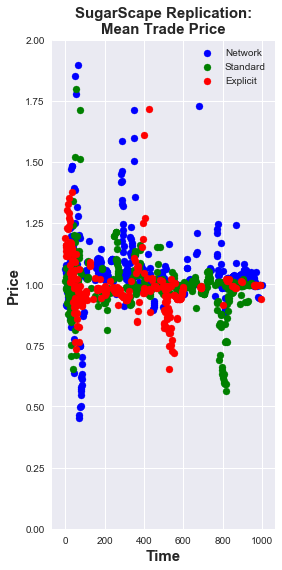

In [72]:
fig, ax = plt.subplots(figsize = (4,9))
ax.scatter(x_n, y_n, label = "Network", color='blue')
ax.scatter(x_s,y_s, label = "Standard", color ='green')
ax.scatter(x_b,y_b, label = "Explicit", color = 'red')
plt.title("SugarScape Replication:\nMean Trade Price", fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Price", fontsize = 15, fontweight = "bold")
plt.legend()
plt.ylim(0,2)

In [73]:
def ind_volume(ind_e):
    x_vol = []
    y_vol = []
    total = 0
    for s, p in ind_e.items(): 
        #if step <=400:

            x_vol.append(s)
            y_vol.append(len(p))
            total += len(p)
    return (x_vol, y_vol, total)

In [74]:
x_vol_stan, y_vol_stan, stan_vol = ind_volume(ind_stan)
x_vol_brute, y_vol_brute, brute_vol = ind_volume(ind_brute)
x_vol_net, y_vol_net, net_vol = ind_volume(ind_net)

In [75]:
len(y_vol_stan)

400

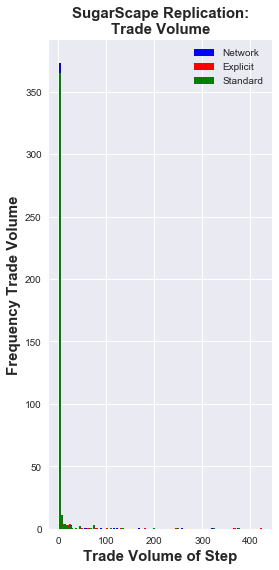

In [76]:
fig2, ax2 = plt.subplots(figsize = (4,9))

ax2.hist(y_vol_net, 100, label = "Network", color='blue')
ax2.hist(y_vol_brute, 100, label = "Explicit", color = 'red')
ax2.hist(y_vol_stan, 100, label = "Standard", color ='green')
plt.title("SugarScape Replication:\nTrade Volume", fontsize = 15, fontweight = "bold")
plt.xlabel("Trade Volume of Step", fontsize = 15, fontweight = "bold")
plt.ylabel("Frequency Trade Volume", fontsize = 15, fontweight = "bold")
plt.legend()

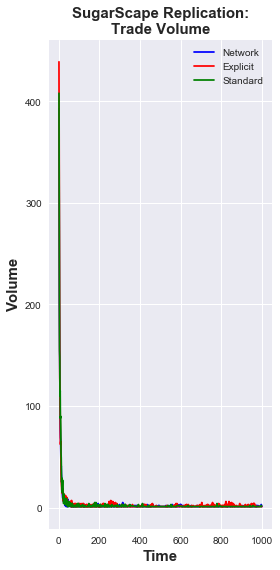

In [35]:
fig2, ax2 = plt.subplots(figsize = (4,9))
ax2.plot(x_vol_net, y_vol_net, label = "Network", color='blue')
ax2.plot(x_vol_brute, y_vol_brute, label = "Explicit", color = 'red')
ax2.plot(x_vol_stan, y_vol_stan, label = "Standard", color ='green')
plt.title("SugarScape Replication:\nTrade Volume", fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Volume", fontsize = 15, fontweight = "bold")
#ax2.text(600,300, "Total Trade Volume: \n "+str(total), fontsize = 15, fontweight = 'bold')
#plt.xlim(100,1000)
#plt.ylim(0,10)
plt.legend()

In [77]:

def sdlm(ind_e):
    x_dev =[]
    y_dev = []
    x_all = []
    y_all = []
    log_prices = {}
    for step, prices in ind_e.items(): 
        log_prices[step] = [log(p) for p in prices]
    for step, log_p in log_prices.items(): 
        #if step <= 400: 


            if len(log_p) <2: 
                pass       
            else: 
                for each in log_p: 
                    x_all.append(step)
                    y_all.append(each)

                x_dev.append(step)
                y_dev.append(stdev(log_p))
    return (x_dev, y_dev, x_all, y_all)
    


In [78]:
x_dev_stan, y_dev_stan, x_all_stan, y_all_stan = sdlm(ind_stan)
x_dev_brute, y_dev_brute, x_all_brute, y_all_brute = sdlm(ind_brute)
x_dev_net, y_dev_net, x_all_net, y_all_net = sdlm(ind_net)


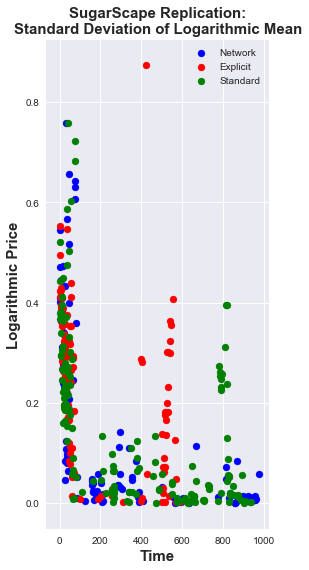

In [79]:
#from numpy.polynomial.polynomial import polyfit
fig3, ax3 = plt.subplots(figsize=(4,9))
ax3.scatter(x_dev_net, y_dev_net, label = "Network", color='blue')
ax3.scatter(x_dev_brute, y_dev_brute, label = "Explicit", color = 'red')
#ax3.scatter(x_all_brute, y_all_brute, color = 'red')
ax3.scatter(x_dev_stan, y_dev_stan, label = "Standard", color = 'green')
plt.title("SugarScape Replication:\nStandard Deviation of Logarithmic Mean", fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Logarithmic Price", fontsize = 15, fontweight = "bold")
plt.legend()


In [80]:
stan_multi_s = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Standard\\stan_multi_sur.p", "rb"))
stan_multi_t = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Standard\\stan_multi_time.p", "rb"))
brute_multi_s = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Explicit\\brute_multi_sur.p", "rb"))
brute_multi_t = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Explicit\\brute_multi_time.p", "rb"))
net_multi_s = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Network\\net_multi_sur.p", "rb"))
net_multi_t =pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape Results\\Results\\Initial\\Network\\net_multi_time.p", "rb"))
net_mean = mean(net_multi_s)
brute_mean = mean(brute_multi_s)
stan_mean = mean(stan_multi_s)
net_time = round(mean(net_multi_t),2)
brute_time = round(mean(brute_multi_t),2)
stan_time = round(mean(stan_multi_t),2)


In [81]:
brute_mean, net_mean, stan_mean

(46.96, 46.68, 46.18)

In [82]:


t, p = stats.ttest_ind(stan_multi_s,brute_multi_s)
brute_p = p * 2
t2,  p2 = stats.ttest_ind(stan_multi_s,net_multi_s)
net_p = p2 * 2
#t3, p3 = stats.ttest_ind(net_multi_s[0:35], stan_multi_s[0:35])
#alt_p = round(p3 *2, 8)
print ("Net-Stan t_test: ", net_p)
print ("Explixit_Stan t_test: ",brute_p)
print ()

Net-Stan t_test:  1.09391235424
Explixit_Stan t_test:  0.674904844494



Text(0,0.5,'Frequency')

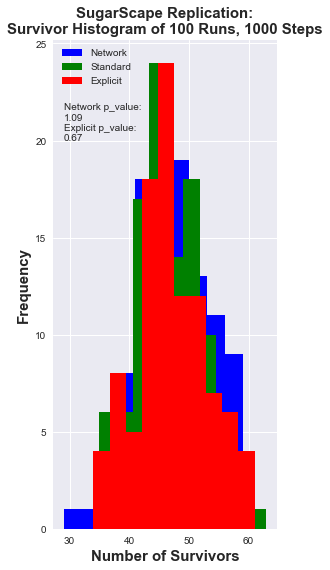

In [84]:
fig5, ax5 = plt.subplots(figsize=(4,9))
plt.hist(net_multi_s, label = "Network", color = 'blue')
plt.hist(stan_multi_s, label = "Standard", color = 'green')
plt.hist(brute_multi_s, label = "Explicit", color = 'red')
plt.text(29,20, "Network p_value:\n"+str(round(net_p,2)) +"\nExplicit p_value:\n"+str(round(brute_p,2)))
plt.legend(loc=2)
plt.title("SugarScape Replication:\nSurvivor Histogram of 100 Runs, 1000 Steps", fontweight = "bold", fontsize = 15)
plt.xlabel("Number of Survivors", fontsize = 15,fontweight = 'bold')
plt.ylabel("Frequency", fontsize = 15,fontweight = 'bold')

In [85]:
t, p = stats.ttest_ind(stan_multi_t,brute_multi_t)
brute_t_p = (p * 2,10)
t2,  p2 = stats.ttest_ind(stan_multi_t,net_multi_t)
net_t_p = (p2 * 2, 10)
brute_t_p, net_t_p

((1.5656314141782622e-32, 10), (0.045396010085582181, 10))

Text(0,0.5,'Frequency')

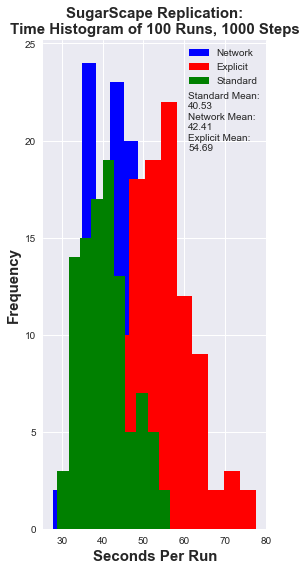

In [87]:
fig6, ax6 = plt.subplots(figsize=(4,9))
plt.hist(net_multi_t, label = "Network", color ='blue')
plt.hist(brute_multi_t, label = "Explicit", color = 'red')
plt.hist(stan_multi_t, label = "Standard", color = 'green')
#plt.text(78, 25, "Network p-value: "+str(net_t_p) +"\nExplicit p-value: "+str(brute_t_p))
plt.legend()
plt.title("SugarScape Replication:\nTime Histogram of 100 Runs, 1000 Steps", fontweight = "bold", fontsize = 15)
plt.text(61, 19.5, "\nStandard Mean:\n"+str(stan_time) + "\nNetwork Mean:\n"+str(net_time) +"\nExplicit Mean:\n"+str(brute_time))
plt.xlabel("Seconds Per Run", fontsize = 15,fontweight = 'bold')
plt.ylabel("Frequency", fontsize = 15,fontweight = 'bold')

## NOT USED

In [41]:
net_type = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_Elegant\\type_df.p", "rb"))

In [42]:
net_type['Run32']

{0: [[], 200],
 1: [[], 200],
 2: [[], 200],
 3: [[], 200],
 4: [[], 200],
 5: [[], 200],
 6: [[], 198],
 7: [[], 196],
 8: [[], 196],
 9: [[], 196],
 10: [[], 193],
 11: [[], 189],
 12: [[], 182],
 13: [[], 179],
 14: [[], 173],
 15: [[], 160],
 16: [[], 155],
 17: [[], 143],
 18: [[], 139],
 19: [[], 133],
 20: [[], 126],
 21: [[], 122],
 22: [[], 116],
 23: [[], 113],
 24: [[], 107],
 25: [[], 104],
 26: [[], 103],
 27: [[], 99],
 28: [[], 94],
 29: [[], 91],
 30: [[], 92],
 31: [[], 89],
 32: [[], 88],
 33: [[], 85],
 34: [[], 85],
 35: [[], 79],
 36: [[], 75],
 37: [[], 74],
 38: [[], 72],
 39: [[], 69],
 40: [[], 68],
 41: [[], 66],
 42: [[], 65],
 43: [[], 65],
 44: [[], 64],
 45: [[], 63],
 46: [[], 62],
 47: [[], 62],
 48: [[], 62],
 49: [[], 62],
 50: [[], 62],
 51: [[], 62],
 52: [[], 61],
 53: [[], 61],
 54: [[], 59],
 55: [[], 59],
 56: [[], 59],
 57: [[], 57],
 58: [[], 56],
 59: [[], 53],
 60: [[], 52],
 61: [[], 52],
 62: [[], 50],
 63: [[], 50],
 64: [[], 48],
 65: [[]